# 1. Import Library

Since hospitality operations are characterized by seasonality, it was decided to extract three full years of customer behavioral data: from 2015 to 2018. All time-based variables, such as when the customer was created in the database (DaysSinceCreation) or the number of days since the customer last stayed at the hotel (DaysSinceLastStay), are a construction based on the last day of extraction - <b> December 31, 2018.</b>

In [1]:
from statistics import mean

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option('display.max_columns', None)

from datetime import datetime, timedelta

In [2]:
df = pd.read_csv('HotelCustomersDataset.csv')

In [3]:
df.head()

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,0,3,8,5,151,1074,Corporate,Corporate,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,61,280.0,53.0,0,0,1,10,5,1100,1100,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,0,1,10,5,1100,1100,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
print(f"No of rows: {df.shape[0]}")
print(f"No of columns: {df.shape[1]}")
print(f"No of unique customers' names: {df['NameHash'].nunique()}")
print(f"No of unique customer's document IDs: {df['DocIDHash'].nunique()}")
print(f"No of unique distribution channels: {df['DistributionChannel'].nunique()}")
print(f"Unique distribution channels: {df['DistributionChannel'].unique()}")
print(f"No of unique market segments: {df['MarketSegment'].nunique()}")
print(f"Unique market segments: {df['MarketSegment'].unique()}")

No of rows: 83590
No of columns: 31
No of unique customers' names: 80642
No of unique customer's document IDs: 76993
No of unique distribution channels: 4
Unique distribution channels: ['Corporate' 'Travel Agent/Operator' 'Direct' 'Electronic Distribution']
No of unique market segments: 7
Unique market segments: ['Corporate' 'Travel Agent/Operator' 'Other' 'Direct' 'Complementary'
 'Groups' 'Aviation']


In [5]:
df.isna().sum()

ID                         0
Nationality                0
Age                     3779
DaysSinceCreation          0
NameHash                   0
DocIDHash                  0
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DaysSinceLastStay          0
DaysSinceFirstStay         0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    83590 non-null  int64  
 1   Nationality           83590 non-null  object 
 2   Age                   79811 non-null  float64
 3   DaysSinceCreation     83590 non-null  int64  
 4   NameHash              83590 non-null  object 
 5   DocIDHash             83590 non-null  object 
 6   AverageLeadTime       83590 non-null  int64  
 7   LodgingRevenue        83590 non-null  float64
 8   OtherRevenue          83590 non-null  float64
 9   BookingsCanceled      83590 non-null  int64  
 10  BookingsNoShowed      83590 non-null  int64  
 11  BookingsCheckedIn     83590 non-null  int64  
 12  PersonsNights         83590 non-null  int64  
 13  RoomNights            83590 non-null  int64  
 14  DaysSinceLastStay     83590 non-null  int64  
 15  DaysSinceFirstStay 

In [7]:
df.nunique().to_frame(name = 'No. of unique values')

,No. of unique values
ID,83590
Nationality,188
Age,105
DaysSinceCreation,1095
NameHash,80642
DocIDHash,76993
AverageLeadTime,418
LodgingRevenue,10257
OtherRevenue,4490
BookingsCanceled,6


In [8]:
df.describe()

,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,83590.000000,79811.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000
mean,41795.500000,45.398028,453.640902,66.196028,298.802087,67.589132,0.002022,0.000634,0.794617,4.649133,2.358536,401.067137,403.349013,0.047482,0.001412,0.000251,0.000873,0.002847,0.001711,0.013219,0.352686,0.142541,0.000335,0.003505,0.000120,0.088372
std,24130.498838,16.572368,313.390291,87.758990,372.851892,114.327776,0.066770,0.029545,0.695778,4.567673,2.281746,347.204955,347.971089,0.212668,0.037546,0.015848,0.029539,0.053284,0.041326,0.114213,0.477809,0.349606,0.018299,0.059101,0.010937,0.283837
min,1.000000,-11.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20898.250000,34.000000,177.000000,0.000000,59.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,26.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41795.500000,46.000000,397.000000,29.000000,234.000000,38.500000,0.000000,0.000000,1.000000,4.000000,2.000000,366.000000,369.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,62692.750000,57.000000,723.000000,103.000000,402.000000,87.675000,0.000000,0.000000,1.000000,6.000000,4.000000,693.000000,697.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,83590.000000,122.000000,1095.000000,588.000000,21781.000000,7730.250000,9.000000,3.000000,66.000000,116.000000,185.000000,1104.000000,1186.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.columns

Index(['ID', 'Nationality', 'Age', 'DaysSinceCreation', 'NameHash',
       'DocIDHash', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue',
       'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn',
       'PersonsNights', 'RoomNights', 'DaysSinceLastStay',
       'DaysSinceFirstStay', 'DistributionChannel', 'MarketSegment',
       'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
       'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
       'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
       'SRQuietRoom'],
      dtype='object')

# 2. Data Preprocessing

In [10]:
# Filter out negative/null ages and leadtimes as they're illogical in this context.
df = df[df['Age'] > 0] 
df = df[df['AverageLeadTime'] >= 0] 

In [11]:
# Presumably, the normal humnan lifespan lasts till a 100 years old and hence, we'll remove entries with > 100 years of age.
df = df[df['Age'] < 100]

# We'll also remove ID column since it just tracks the index of each booking.
# df.drop('ID', axis = 1, inplace = True)

In [12]:
df['TotalRevenue']  = df['LodgingRevenue'] + df['OtherRevenue']

In [13]:
df['DaysSinceCreation'].unique()

array([ 150, 1095, 1094, ...,    2,    1,    0])

In [14]:
# Note: Last date of Extraction is on 31 december 2018
date_val = pd.to_datetime('December 31, 2018')
df['datetime'] = date_val

In [15]:
#Calculating the customer's first booking creation date
df['entry_created_date'] = pd.to_datetime(df['datetime']) - pd.to_timedelta(df['DaysSinceCreation'], unit = 'd')

#Calculating the customer's first stay
df['first_stay_date'] = pd.to_datetime(df['datetime']) - pd.to_timedelta(df['DaysSinceFirstStay'], unit = 'd')

#Calculating the customer's last stay
df['last_stay_date'] = pd.to_datetime(df['datetime']) - pd.to_timedelta(df['DaysSinceLastStay'], unit = 'd')

In [16]:
#Replace all negative DaysSinceLastStay to 0
df['DaysSinceLastStay'][df['DaysSinceLastStay'] < 0] = 0

/var/folders/t_/0fcmksbj4_n0c0w277z2ztwm0000gn/T/ipykernel_26463/1423934199.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DaysSinceLastStay'][df['DaysSinceLastStay'] < 0] = 0


In [17]:
df['BookingsCheckedIn'].unique()

array([ 3,  0,  1,  9, 11,  2,  7,  8,  5,  6,  4, 66, 15, 29, 25, 10, 17,
       13, 26, 23, 12, 57, 40, 18, 14, 24, 20, 34])

In [18]:
# My assumption is that this 1 account (NameHash) is responsible for making various bookings for different customers
df[df['DocIDHash'] == '0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C268E6548699E78E587AAEA'][['NameHash','DistributionChannel','MarketSegment',
                                                                                            'Nationality','DocIDHash',
                                                                                            'first_stay_date', 'last_stay_date',
                                                                                            'DaysSinceFirstStay','DaysSinceLastStay',
                                                                                            'BookingsCheckedIn', 'Age', 'RoomNights',
                                                                                           'TotalRevenue']]

,NameHash,DistributionChannel,MarketSegment,Nationality,DocIDHash,first_stay_date,last_stay_date,DaysSinceFirstStay,DaysSinceLastStay,BookingsCheckedIn,Age,RoomNights,TotalRevenue
745,0x32C516CEF6E82ECE02E733A3A6DBBC6E36F77B703168...,Direct,Direct,PRT,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,2016-01-23,2016-01-23,1073,1073,1,39.0,4,508.0
843,0x73D4D9EDB1E9A0CC8F7E16F7FDBC3C609BD294932297...,Corporate,Corporate,PRT,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,2016-01-30,2018-07-17,1066,167,3,47.0,3,254.0
908,0x2FAE495C677DE629D1FD1161848FC63A4DBB24FBDC2D...,Travel Agent/Operator,Other,PRT,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,2016-02-02,2016-02-02,1063,1063,1,32.0,1,80.0
1003,0xC0C4397874904E7BD8FF3B1324C83C49E5118F609EDE...,Travel Agent/Operator,Other,PRT,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,2016-02-04,2016-02-04,1061,1061,1,30.0,3,214.8
1004,0xFB4BABE3ACC598498E302B60CA3C7F3E4FE53287AF79...,Travel Agent/Operator,Other,PRT,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,2019-01-01,2019-01-01,-1,0,0,29.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71704,0xDE2BCE177DBBB454E317C8B3CC46031643B70417C06A...,Travel Agent/Operator,Other,PRT,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,2018-09-08,2018-09-08,114,114,1,20.0,3,507.0
72284,0xFCE8C2061463A2B0E9D387E69101D274E1ACC9A3F2D5...,Direct,Direct,PRT,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,2019-01-01,2019-01-01,-1,0,0,58.0,0,0.0
76023,0x432982B6113589960DF22E881947D4B663D31D06BD4A...,Direct,Direct,PRT,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,2019-01-01,2019-01-01,-1,0,0,64.0,0,0.0
79940,0x5CF1DBDFEF3A0CC5FBAC0BF0A28ADDB3FE3FCFBAF3DD...,Travel Agent/Operator,Travel Agent/Operator,PRT,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,2019-01-01,2019-01-01,-1,0,0,43.0,0,0.0


In [19]:
#df.groupby('NameHash').filter(lambda x: len(x) > 1)

In [20]:
df.isna().sum()

ID                      0
Nationality             0
Age                     0
DaysSinceCreation       0
NameHash                0
DocIDHash               0
AverageLeadTime         0
LodgingRevenue          0
OtherRevenue            0
BookingsCanceled        0
BookingsNoShowed        0
BookingsCheckedIn       0
PersonsNights           0
RoomNights              0
DaysSinceLastStay       0
DaysSinceFirstStay      0
DistributionChannel     0
MarketSegment           0
SRHighFloor             0
SRLowFloor              0
SRAccessibleRoom        0
SRMediumFloor           0
SRBathtub               0
SRShower                0
SRCrib                  0
SRKingSizeBed           0
SRTwinBed               0
SRNearElevator          0
SRAwayFromElevator      0
SRNoAlcoholInMiniBar    0
SRQuietRoom             0
TotalRevenue            0
datetime                0
entry_created_date      0
first_stay_date         0
last_stay_date          0
dtype: int64

# 3. EDA

In [21]:
categorical_features = ['Nationality','DistributionChannel', 'MarketSegment']
numerical_features = ['Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue','OtherRevenue', 'BookingsCanceled',
                      'BookingsNoShowed','BookingsCheckedIn','PersonsNights','RoomNights','DaysSinceLastStay',
                     'DaysSinceFirstStay','TotalRevenue'
                     ]
binary_features = ['SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 
                   'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom']

In [22]:
#Number of unique customer's document ID (DocIDHash)
df['DocIDHash'].nunique()

76687

In [23]:
#Number of unique customer's name (NameHash)
df['NameHash'].nunique()

77301

In [24]:
#Number of unique bookings
df['ID'].nunique()

79735

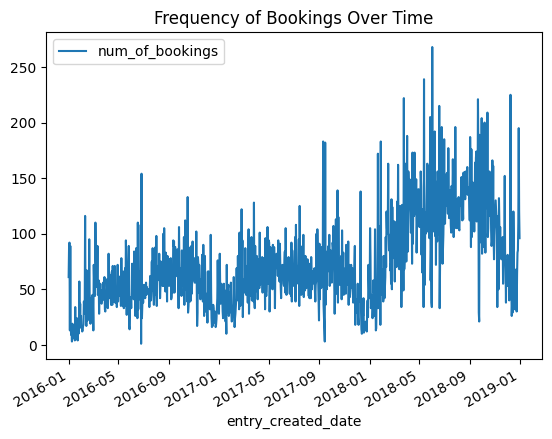

In [25]:
# Number of bookings & avg/ total revenue made per day
bookings_per_day = df[['entry_created_date', 'ID', 'TotalRevenue']].groupby('entry_created_date').agg(
    num_of_bookings = ('ID', "count"),
    total_revenue = ('TotalRevenue', "sum"),
    avg_revenue = ('TotalRevenue', "mean")
).reset_index()

bookings_per_day.plot(kind = 'line', x = 'entry_created_date', y = 'num_of_bookings')
plt.title('Frequency of Bookings Over Time')
plt.show()

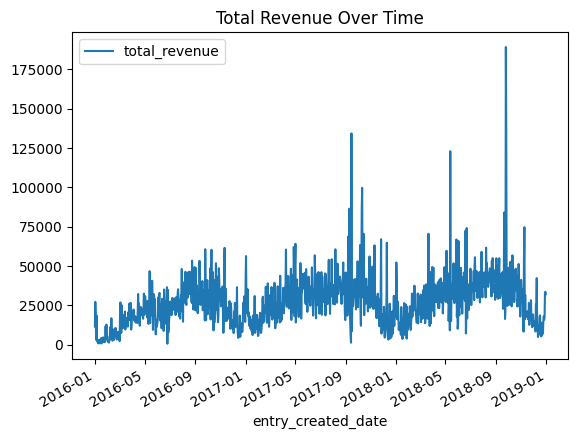

In [26]:
bookings_per_day.plot(kind = 'line', x = 'entry_created_date', y = 'total_revenue')
plt.title('Total Revenue Over Time')
plt.show()

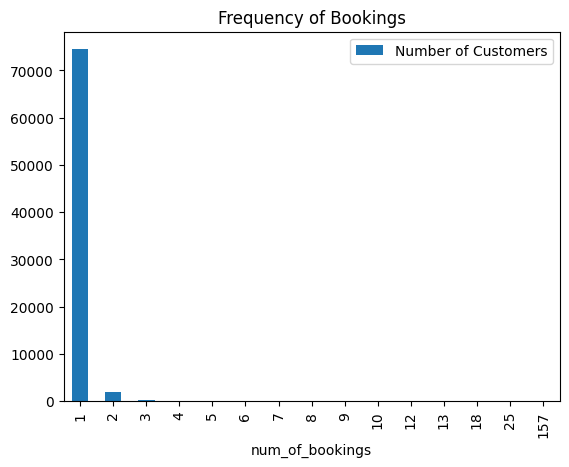

In [27]:
#Number of bookings made per customer
bookings_per_customer = df[['DocIDHash', 'NameHash']].groupby('DocIDHash').count()
bookings_per_customer.columns = ['num_of_bookings']
bookings_per_customer.reset_index(inplace = True)

#Frequency of Booking
freq_bookings = bookings_per_customer.groupby('num_of_bookings').count()
freq_bookings.columns = ['Number of Customers']
freq_bookings.reset_index(inplace = True)
freq_bookings.plot(kind = 'bar', x ='num_of_bookings', y = 'Number of Customers')
plt.title('Frequency of Bookings')
plt.show()

In [28]:
freq_bookings

,num_of_bookings,Number of Customers
0,1,74459
1,2,1872
2,3,230
3,4,60
4,5,28
5,6,13
6,7,11
7,8,4
8,9,2
9,10,2


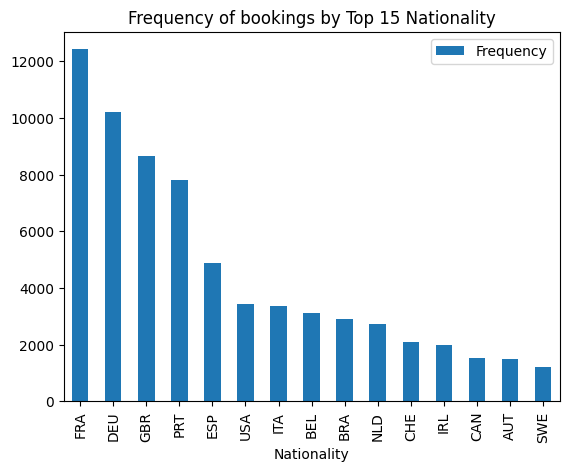

In [29]:
bookings_per_nationality = df[['DocIDHash', 'Nationality']].groupby('Nationality').count().sort_values(by = 'DocIDHash', ascending = False).head(15)
bookings_per_nationality.columns = ['Frequency']
bookings_per_nationality.plot(kind = 'bar')
plt.title('Frequency of bookings by Top 15 Nationality')
plt.show()

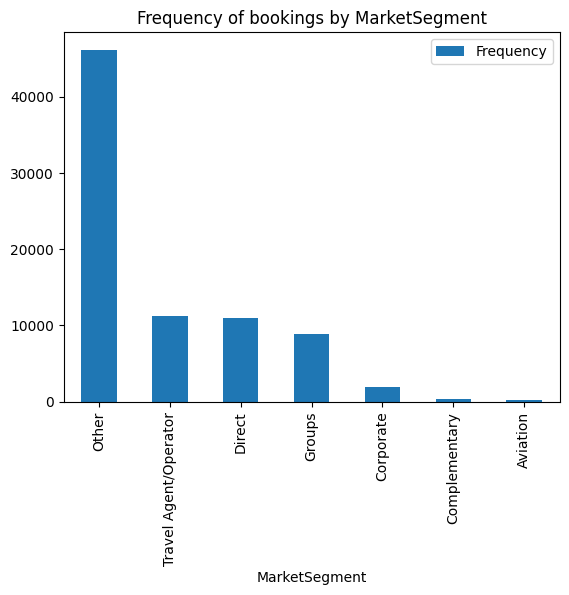

In [30]:
bookings_per_marketsegment = df[['DocIDHash', 'MarketSegment']].groupby('MarketSegment').count().sort_values(by = 'DocIDHash', ascending = False)
bookings_per_marketsegment.columns = ['Frequency']
bookings_per_marketsegment.plot(kind = 'bar')
plt.title('Frequency of bookings by MarketSegment')
plt.show()

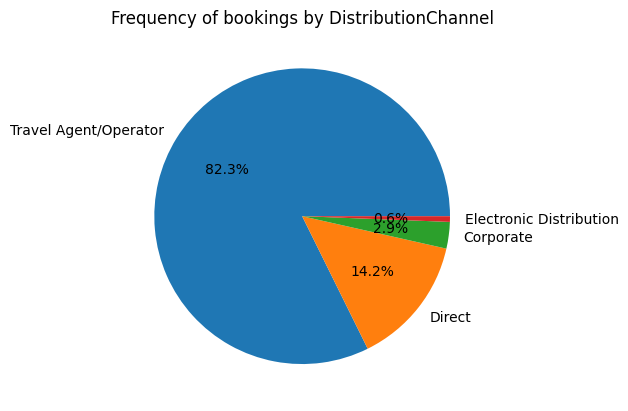

In [31]:
bookings_per_channel = df[['DocIDHash', 'DistributionChannel']].groupby('DistributionChannel').count().sort_values(by = 'DocIDHash', ascending = False)
bookings_per_channel.columns = ['Frequency']
bookings_per_channel.reset_index(inplace = True)
plt.pie(bookings_per_channel['Frequency'], labels=bookings_per_channel['DistributionChannel'], autopct='%1.1f%%')
plt.title('Frequency of bookings by DistributionChannel')
plt.show()

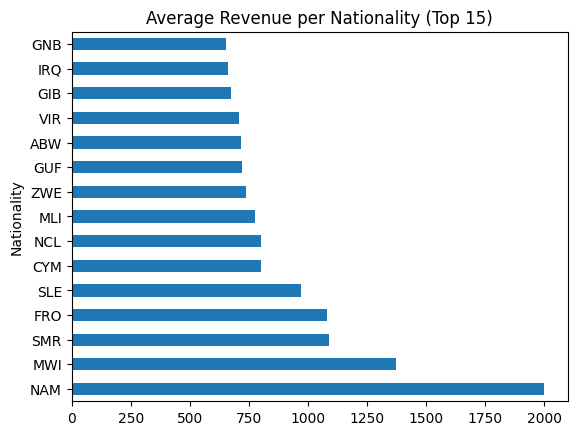

In [32]:
#Revenue by Nationalities
revenue_per_segment = df[['TotalRevenue', 'Nationality']].groupby('Nationality').mean().sort_values(by = 'TotalRevenue', ascending = False).head(15)
revenue_per_segment.plot(kind = 'barh', legend = False)
plt.title('Average Revenue per Nationality (Top 15)')
plt.show()

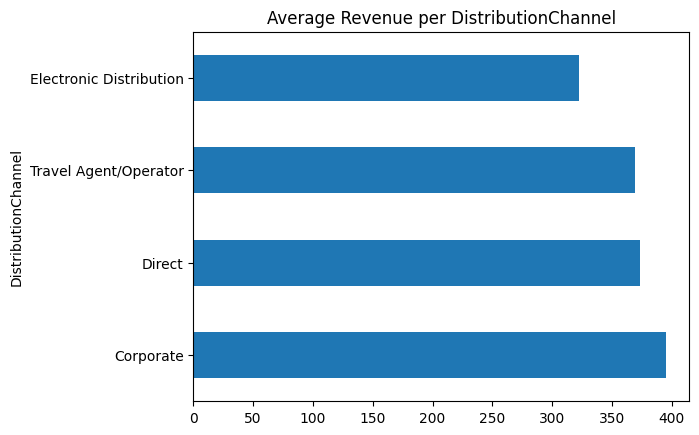

In [33]:
#Revenue by Channels
revenue_per_channel = df[['TotalRevenue', 'DistributionChannel']].groupby('DistributionChannel').mean().sort_values(by = 'TotalRevenue', ascending = False)
revenue_per_channel.plot(kind = 'barh', legend = False)
plt.title('Average Revenue per DistributionChannel')
plt.show()

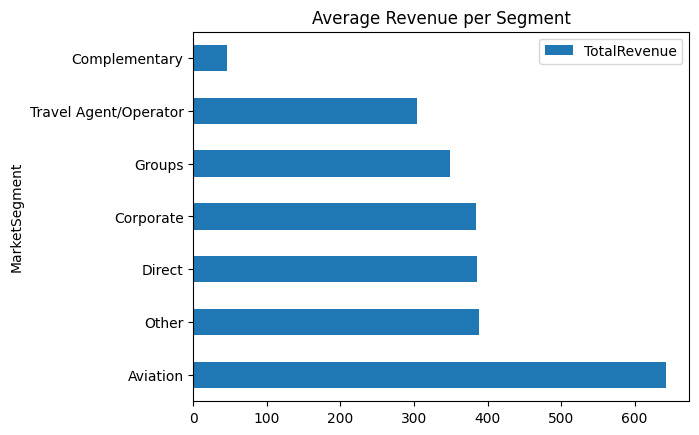

In [34]:
#Revenue by Segments
revenue_per_segment = df[['TotalRevenue', 'MarketSegment']].groupby('MarketSegment').mean().sort_values(by = 'TotalRevenue', ascending = False)
revenue_per_segment.plot(kind = 'barh')
plt.title('Average Revenue per Segment')
plt.show()

# 4. Clustering (RFM)

In [35]:
#Get latest day
print(f"Latest entry date: {df['entry_created_date'].max()}")
print(f"Earliest entry date: {df['entry_created_date'].min()}")

Latest entry date: 2018-12-31 00:00:00
Earliest entry date: 2016-01-01 00:00:00


In [36]:
print(f"No of bookings in 2018: {len(df[df['entry_created_date'].dt.year == 2018])}")
print(f"No of bookings in 2017: {len(df[df['entry_created_date'].dt.year == 2017])}")
print(f"No of bookings in 2016: {len(df[df['entry_created_date'].dt.year == 2016])}")


No of bookings in 2018: 39312
No of bookings in 2017: 21615
No of bookings in 2016: 18808


In [37]:
#Function to create RFM variables, and separate them into clusters
def create_segments(rfm_df):
    rfm_df = rfm_df.groupby(['DocIDHash', 'NameHash']).agg(
        recency = ('DaysSinceLastStay', 'min'),
        first_stay = ('DaysSinceFirstStay', 'max'),
        frequency = ('ID', 'count'),
        total_sales = ('TotalRevenue', 'sum'),
        avg_sales = ('TotalRevenue', 'mean')
    ).reset_index()

    sales_median = rfm_df['avg_sales'].mean()

    conditions = [
        (rfm_df['recency'] > 365*3),
        (rfm_df['recency'] > 365*2) & (rfm_df['recency'] <= 365*3),
        (rfm_df['recency'] <= 365*2) & (rfm_df['recency'] > 365) & (rfm_df['first_stay'] <= 365*2),
        (rfm_df['recency'] <= 365*2) & (rfm_df['recency'] > 365) & (rfm_df['first_stay'] > 365*2) & (rfm_df['avg_sales'] < sales_median),
        (rfm_df['recency'] <= 365*2) & (rfm_df['recency'] > 365) & (rfm_df['first_stay'] > 365*2) & (rfm_df['avg_sales'] >= sales_median),
        (rfm_df['recency'] <= 365) & (rfm_df['first_stay'] <= 365),
        (rfm_df['recency'] <= 365) & (rfm_df['first_stay'] > 365) & (rfm_df['avg_sales'] < sales_median),
        (rfm_df['recency'] <= 365) & (rfm_df['first_stay'] > 365) & (rfm_df['avg_sales'] >= sales_median)
        ]
    choices = ["inactive", "cold", "new warm", "warm low value", "warm high value", "new active", "active low value", "active high value"]
    rfm_df['segment'] = np.select(conditions, choices)
    rfm_df[['DocIDHash', 'segment']].groupby('segment').count().reset_index()

    return rfm_df

## 4.1 Get 2018 data

In [38]:
df_2018 = create_segments(df)
df_2018.head()

,DocIDHash,NameHash,recency,first_stay,frequency,total_sales,avg_sales,segment
0,0x0000108140F2C5096749EBCA8C52DDBDBCBD20D63E56...,0xC2B2DFA663C2664420373792707F7C46C1C343AA78B9...,122,122,1,392.00,392.00,new active
1,0x000034E73BEE573F84771587D88F724C8A7F65AE2C3F...,0xAB7D84CF513582A6A9BC0399CCCB6EE3F3A0A441B81C...,14,14,1,796.60,796.60,new active
2,0x000251EC8D7F3BE7FC8CB193BDDF11846E968499FC4B...,0xF296143AA40CD09F70DFB0E56C63BB4E693D01938E69...,891,891,1,84.66,84.66,cold
3,0x000332830675599DDF4488F978D6C028DF42B72B9591...,0x0644B1E77EC36379CA4BBA74E09A98B5A2B4EC10DC5D...,935,935,1,274.30,274.30,cold
4,0x00033F8286404317DFFE30F4EA21D0B694F03159386A...,0x042DB689E5B00193BB2A5F929B5F7D7597FA622496CE...,798,798,1,446.00,446.00,cold


In [39]:
df_2018[['recency', 'first_stay', 'frequency', 'total_sales', 'avg_sales']].describe()

,recency,first_stay,frequency,total_sales,avg_sales
count,77696.000000,77696.000000,77696.000000,77696.000000,77696.000000
mean,393.435750,398.330326,1.026243,380.073597,370.652176
std,343.591316,344.925206,0.216076,456.587733,431.261342
min,0.000000,-1.000000,1.000000,0.000000,0.000000
25%,18.000000,26.000000,1.000000,78.000000,76.000000
50%,347.000000,364.000000,1.000000,300.300000,295.200000
75%,677.000000,685.000000,1.000000,512.000000,504.000000
max,1104.000000,1117.000000,15.000000,13688.150000,11930.660000


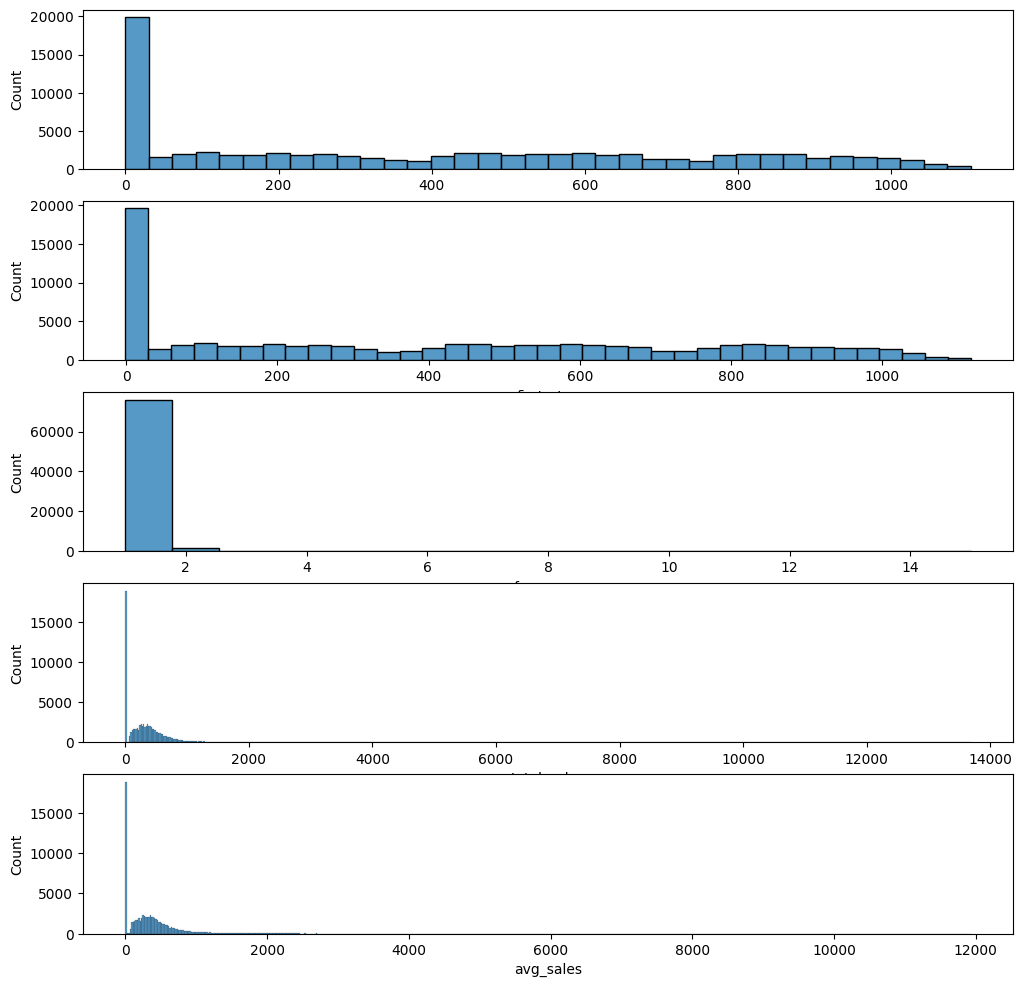

In [40]:
plt.figure(figsize=(12,12))
# Plot distribution of Recency
plt.subplot(5, 1, 1); sns.histplot(df_2018['recency'])
# Plot distribution of Days since first stay
plt.subplot(5, 1, 2); sns.histplot(df_2018['first_stay'])
# Plot distribution of Frequency
plt.subplot(5, 1, 3); sns.histplot(df_2018['frequency'])
# Plot distribution of Total monetary value
plt.subplot(5, 1, 4); sns.histplot(df_2018['total_sales'])
# Plot distribution of Average monetary value
plt.subplot(5, 1, 5); sns.histplot(df_2018['avg_sales'])

# Show the plot
plt.show()

## 4.2 Get 2017 data

In [41]:
df_2017 = df[df['entry_created_date'].dt.year == 2017]
df_2017 = create_segments(df_2017)
df_2017.head()

,DocIDHash,NameHash,recency,first_stay,frequency,total_sales,avg_sales,segment
0,0x000693AF903A1E344EE585488CB30A3E721EC9D9467C...,0x80B03FEDBFA194A761E641BEF46A74F52095F2BB3B26...,409,409,1,244.0,244.0,new warm
1,0x00090C6179D6A63373ABCC0C6C57A4DF5C00E6220436...,0x5F77D7DAB4C2A000EE90984AE9B208266282CE85CDCF...,462,462,1,1398.0,1398.0,new warm
2,0x0009381D6CD48EE21D716CECB98AD817437AB73DA2B5...,0x591F3ECB4598469BFDFE049617D6058DF4EF952985F8...,707,707,1,366.9,366.9,new warm
3,0x000A11E1C80AADF21B9DBE614556D6B0C69FFF804185...,0xF3613B48BC49A613799B97B8AC5AE96EAD6A006F859A...,615,615,1,625.0,625.0,new warm
4,0x000AA8793594E09B313E959B2094F7030D9A8496A690...,0x3144D43B5CB00B372A8BCC96EAD89715BBA72D8BE405...,712,712,1,267.0,267.0,new warm


In [42]:
df_2017[['recency', 'first_stay', 'frequency', 'total_sales', 'avg_sales']].describe()

,recency,first_stay,frequency,total_sales,avg_sales
count,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000
mean,545.984879,548.967598,1.015027,497.528154,491.147422
std,100.745982,97.117772,0.148122,445.666566,426.299588
min,2.000000,366.000000,1.000000,0.000000,0.000000
25%,463.000000,465.000000,1.000000,251.300000,248.800000
50%,546.000000,548.000000,1.000000,393.400000,390.000000
75%,628.000000,630.000000,1.000000,595.100000,589.500000
max,735.000000,1073.000000,6.000000,12554.500000,11930.660000


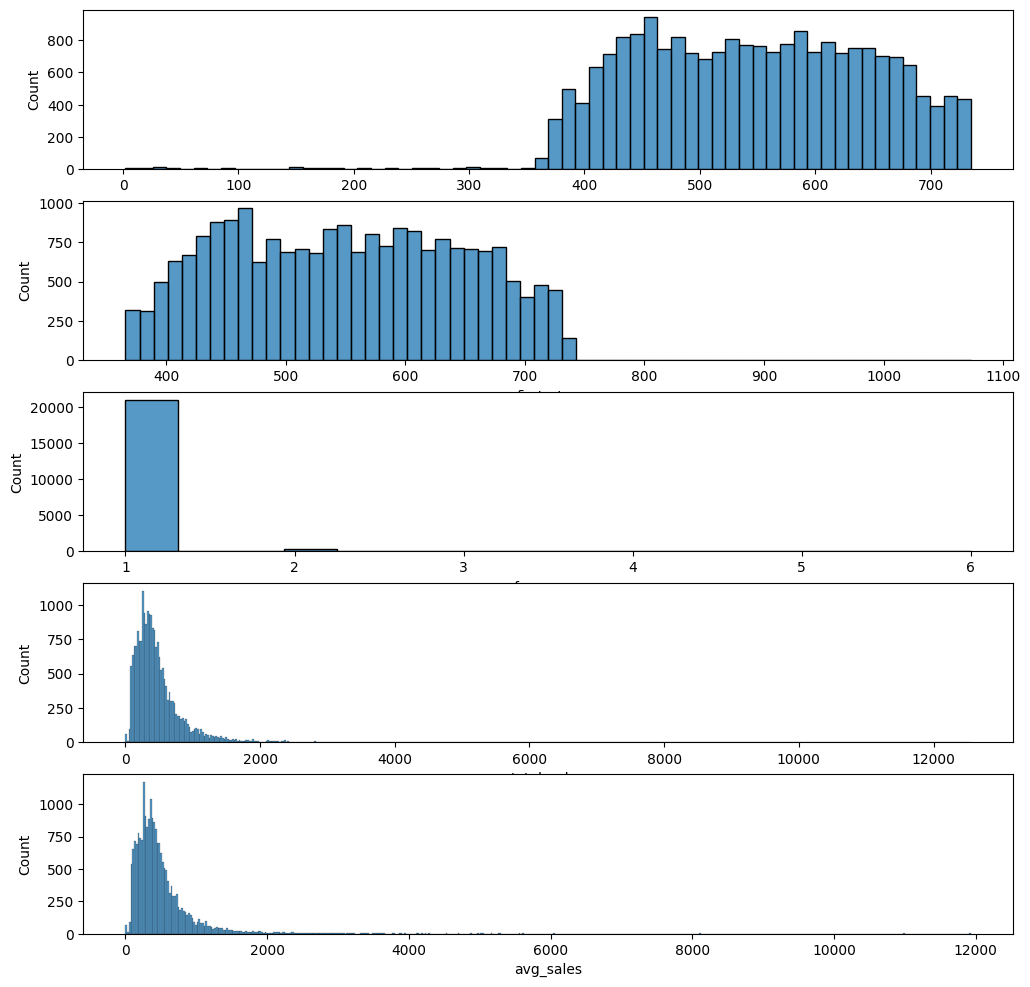

In [43]:
plt.figure(figsize=(12,12))
# Plot distribution of Recency
plt.subplot(5, 1, 1); sns.histplot(df_2017['recency'])
# Plot distribution of Days since first stay
plt.subplot(5, 1, 2); sns.histplot(df_2017['first_stay'])
# Plot distribution of Frequency
plt.subplot(5, 1, 3); sns.histplot(df_2017['frequency'])
# Plot distribution of Total monetary value
plt.subplot(5, 1, 4); sns.histplot(df_2017['total_sales'])
# Plot distribution of Average monetary value
plt.subplot(5, 1, 5); sns.histplot(df_2017['avg_sales'])

# Show the plot
plt.show()

## 4.3 Combine 2017 and 2018 data

In [44]:
df_concat = df_2018.merge(df_2017, on='DocIDHash', how='left', suffixes=('_2018', '_2017'))
df_concat

,DocIDHash,NameHash_2018,recency_2018,first_stay_2018,frequency_2018,total_sales_2018,avg_sales_2018,segment_2018,NameHash_2017,recency_2017,first_stay_2017,frequency_2017,total_sales_2017,avg_sales_2017,segment_2017
0,0x0000108140F2C5096749EBCA8C52DDBDBCBD20D63E56...,0xC2B2DFA663C2664420373792707F7C46C1C343AA78B9...,122,122,1,392.00,392.00,new active,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0x000034E73BEE573F84771587D88F724C8A7F65AE2C3F...,0xAB7D84CF513582A6A9BC0399CCCB6EE3F3A0A441B81C...,14,14,1,796.60,796.60,new active,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0x000251EC8D7F3BE7FC8CB193BDDF11846E968499FC4B...,0xF296143AA40CD09F70DFB0E56C63BB4E693D01938E69...,891,891,1,84.66,84.66,cold,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0x000332830675599DDF4488F978D6C028DF42B72B9591...,0x0644B1E77EC36379CA4BBA74E09A98B5A2B4EC10DC5D...,935,935,1,274.30,274.30,cold,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0x00033F8286404317DFFE30F4EA21D0B694F03159386A...,0x042DB689E5B00193BB2A5F929B5F7D7597FA622496CE...,798,798,1,446.00,446.00,cold,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81085,0xFFF8569CC2C2226107723BF27CE94C6DA09599A000AE...,0x9DA1510945B842C6E23E20B836795A40BA35BFB9D773...,0,-1,1,0.00,0.00,new active,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81086,0xFFFC7D7B5A253B5AC6E8BD2CFA413B8D86AB2D6605A1...,0x9177EEF102D6DFC7DA622B75E419A7D2ACA59DB6B84A...,440,440,1,141.00,141.00,new warm,0x9177EEF102D6DFC7DA622B75E419A7D2ACA59DB6B84A...,440.0,440.0,1.0,141.0,141.0,new warm
81087,0xFFFEB947FA7D1AF091CB03379D5BF244A9EF2E98333D...,0x103865B2F58D0621768C26CE36C5C10AB0EFCE59AC38...,769,772,2,162.40,81.20,cold,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81088,0xFFFF145139954807873CB1012C5267086CA9AF35A88B...,0x5475A911485935A8239047E9CBE951A72A7B3476DA14...,363,363,1,622.00,622.00,new active,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 5. Customer Lifetime Value

## 5.1 Get transition matrix

In [45]:
trans_mat = df_concat.loc[:,['segment_2018', 'segment_2017']].pivot_table(index='segment_2017', columns='segment_2018', aggfunc=len, fill_value=0)

# get percentage values
trans_mat["sum"] = trans_mat.sum(axis=1)
trans_mat = trans_mat.loc[:,"active high value":"warm low value"].div(trans_mat["sum"], axis=0)

# sort rows and columns by hierarchy of customers
trans_mat = trans_mat.reindex(['active high value', 'active low value', 'warm high value', 'warm low value', 'new active', 'new warm', 'cold'], axis=0)
trans_mat = trans_mat.reindex(['active high value', 'active low value', 'warm high value', 'warm low value', 'new active', 'new warm', 'cold', 'inactive'], axis=1)

# fill null values with 0
trans_mat = trans_mat.fillna(0)

# data is only 3 years long, inactive customers (last activity >3 years) only observed in 2018 and we cannot predict their transition. assume these customers are lost forever
inactiverow = pd.Series({'active high value': 0, 'active low value': 0, 'warm high value': 0, 'warm low value': 0, 'new active': 0, 'new warm': 0, 'cold': 0, 'inactive': 1},name='inactive')
trans_mat = trans_mat.append(inactiverow)
trans_mat

/var/folders/t_/0fcmksbj4_n0c0w277z2ztwm0000gn/T/ipykernel_26463/3975015579.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trans_mat = trans_mat.append(inactiverow)


,active high value,active low value,warm high value,warm low value,new active,new warm,cold,inactive
segment_2017,,,,,,,,
active high value,0.674603,0.079365,0.015873,0.007937,0.158730,0.039683,0.023810,0.0
active low value,0.080000,0.180000,0.012000,0.000000,0.424000,0.104000,0.200000,0.0
warm high value,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
warm low value,0.000000,0.333333,0.666667,0.000000,0.000000,0.000000,0.000000,0.0
new active,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
new warm,0.004332,0.007970,0.001757,0.003474,0.073323,0.869579,0.039563,0.0
cold,0.000000,0.000000,0.000000,0.000000,0.000000,0.010870,0.989130,0.0
inactive,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0


## 3.2 Get number of customers in each segment after 10 periods

In [46]:
def mat_mult(mat):
  yearlst = ['2018']
  data_10year = [mat]
  for i in range(1,11):
    yearlst.append(str(2018 + i))
    data_10year.append(data_10year[i-1].dot(trans_mat))

  mat_10year = pd.DataFrame(np.transpose(data_10year), index = ['active high value', 'active low value', 'warm high value', 'warm low value', 'new active', 'new warm', 'cold', 'inactive'], columns = yearlst)
  return mat_10year

In [47]:
# Get 2018 count of customers in each segment
mat_2018 = np.array(df_2018['segment'].value_counts())

# matrix multiplication
mat_10year = mat_mult(mat_2018).round(2)
mat_10year

,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
active high value,38896.0,27904.63,19394.60,13393.68,9244.79,6388.46,4423.08,3070.17,2138.08,1495.22,1051.23
active low value,20809.0,6918.93,3593.53,2305.80,1581.17,1107.14,783.25,559.12,403.19,294.24,217.77
warm high value,17175.0,18212.99,18951.75,19468.35,19833.38,20093.58,20280.84,20417.13,20517.65,20592.90,20650.21
warm low value,256.0,309.13,234.73,172.00,126.27,93.74,70.62,54.09,42.17,33.50,27.11
new active,253.0,15006.15,7642.84,4983.66,3525.06,2567.74,1903.87,1434.92,1100.26,859.19,683.79
new warm,125.0,3817.42,5202.89,5747.42,5863.07,5733.57,5465.53,5126.10,4757.87,4387.37,4030.48
cold,101.0,5192.74,7335.51,8642.11,9555.61,10220.06,10709.35,11071.14,11338.53,11535.07,11677.72
inactive,81.0,81.00,81.00,81.00,81.00,81.00,81.00,81.00,81.00,81.00,81.00


## 3.3 Get churn rates

In [48]:
activeHigh = np.array([100,0,0,0,0,0,0,0])
activeHighChurn_10year = mat_mult(activeHigh)
activeHighChurn_10year = activeHighChurn_10year.round(2)
activeHighChurn_10year

,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
active high value,100.0,67.46,46.16,31.74,21.86,15.08,10.42,7.21,5.01,3.49,2.44
active low value,0.0,7.94,7.08,5.18,3.65,2.56,1.80,1.28,0.91,0.66,0.48
warm high value,0.0,1.59,3.29,4.49,5.33,5.92,6.35,6.65,6.87,7.04,7.16
warm low value,0.0,0.79,0.55,0.39,0.28,0.21,0.15,0.12,0.09,0.07,0.05
new active,0.0,15.87,14.36,10.84,7.87,5.71,4.18,3.10,2.34,1.79,1.39
new warm,0.0,3.97,6.98,8.70,9.45,9.58,9.33,8.85,8.27,7.64,7.02
cold,0.0,2.38,5.71,8.43,10.48,11.99,13.11,13.94,14.57,15.04,15.39
inactive,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [49]:
print(f"Active High Value has a churn rate of {activeHighChurn_10year['2028'][['cold', 'inactive']].sum()}% in 10 years")

Active High Value has a churn rate of 15.39% in 10 years


In [50]:
activeLow = np.array([0,100,0,0,0,0,0,0])
activeLowChurn_10year = mat_mult(activeLow)
activeLowChurn_10year = activeLowChurn_10year.round(2)
activeLowChurn_10year

,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
active high value,0.0,8.0,6.88,5.01,3.54,2.49,1.76,1.26,0.91,0.66,0.49
active low value,100.0,18.0,3.96,1.38,0.76,0.52,0.39,0.29,0.23,0.18,0.15
warm high value,0.0,1.2,1.56,1.80,1.98,2.12,2.22,2.30,2.37,2.42,2.47
warm low value,0.0,0.0,0.10,0.09,0.08,0.06,0.05,0.04,0.04,0.03,0.03
new active,0.0,42.4,9.66,3.61,2.18,1.63,1.30,1.07,0.90,0.76,0.66
new warm,0.0,10.4,11.45,10.90,10.10,9.28,8.51,7.79,7.14,6.56,6.04
cold,0.0,20.0,23.98,25.13,25.69,26.04,26.29,26.46,26.57,26.63,26.66
inactive,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [51]:
print(f"Active Low Value has a churn rate of {activeLowChurn_10year['2028'][['cold', 'inactive']].sum()}% in 10 years")

Active Low Value has a churn rate of 26.66% in 10 years


In [52]:
warmHigh = np.array([0,0,100,0,0,0,0,0])
warmHighChurn_10year = mat_mult(warmHigh)
warmHighChurn_10year = warmHighChurn_10year.round(2)
warmHighChurn_10year

,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
active high value,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
active low value,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
warm high value,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
warm low value,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
new active,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
new warm,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cold,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
inactive,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
print(f"Warm High Value has a churn rate of {warmHighChurn_10year['2028'][['cold', 'inactive']].sum()}% in 10 years")

Warm High Value has a churn rate of 0.0% in 10 years


In [54]:
warmLow = np.array([0,0,0,100,0,0,0,0])
warmLowChurn_10year = mat_mult(warmLow)
warmLowChurn_10year = warmLowChurn_10year.round(2)
warmLowChurn_10year

,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
active high value,0.0,0.00,2.67,2.29,1.67,1.18,0.83,0.59,0.42,0.30,0.22
active low value,0.0,33.33,6.00,1.32,0.46,0.25,0.17,0.13,0.10,0.08,0.06
warm high value,0.0,66.67,67.07,67.19,67.27,67.33,67.37,67.41,67.43,67.46,67.47
warm low value,100.0,0.00,0.00,0.03,0.03,0.03,0.02,0.02,0.01,0.01,0.01
new active,0.0,0.00,14.13,3.22,1.20,0.73,0.54,0.43,0.36,0.30,0.25
new warm,0.0,0.00,3.47,3.82,3.63,3.37,3.09,2.84,2.60,2.38,2.19
cold,0.0,0.00,6.67,7.99,8.38,8.56,8.68,8.76,8.82,8.86,8.88
inactive,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [55]:
print(f"Warm Low Value has a churn rate of {warmLowChurn_10year['2028'][['cold', 'inactive']].sum()}% in 10 years")

Warm Low Value has a churn rate of 8.88% in 10 years


## 3.4 Get CLV

In [58]:
# Get the revenue generated in 2018 for all customers
df_revenue_2018 = df.copy()
df_revenue_2018 = df_revenue_2018[df_revenue_2018['entry_created_date'].dt.year == 2018]
df_revenue_2018 = df_revenue_2018[['DocIDHash', 'NameHash', 'TotalRevenue']].groupby(['DocIDHash', 'NameHash']).sum()
df_revenue_2018.columns = ['revenue_2018']
df_revenue_2018 = df_revenue_2018.reset_index()
df_revenue_2018.head()

,DocIDHash,NameHash,revenue_2018
0,0x0000108140F2C5096749EBCA8C52DDBDBCBD20D63E56...,0xC2B2DFA663C2664420373792707F7C46C1C343AA78B9...,392.00
1,0x000034E73BEE573F84771587D88F724C8A7F65AE2C3F...,0xAB7D84CF513582A6A9BC0399CCCB6EE3F3A0A441B81C...,796.60
2,0x000693C9D561E4F9B0395BF861962C81A3030036DEBF...,0xDF91CA80C120FAA25F59DE9860839D71D38BC9D3110E...,613.50
3,0x00077445A3629576765DA2715BBB8CEF600427697742...,0x8BDE518090088E4C5453E6840A3AEA65A2CDABB4D1B1...,0.00
4,0x000AD082652053B52D3720E94836FA9B112ECB43A5D7...,0x138CBE97F3116916A8D263D81407BC893A04177F43C4...,655.52


In [59]:
# Merge revenue generated in 2018 to 2018 customers df
concat_2018 = df_2018.merge(df_revenue_2018, on=['DocIDHash', 'NameHash'])
concat_2018.head()

,DocIDHash,NameHash,recency,first_stay,frequency,total_sales,avg_sales,segment,revenue_2018
0,0x0000108140F2C5096749EBCA8C52DDBDBCBD20D63E56...,0xC2B2DFA663C2664420373792707F7C46C1C343AA78B9...,122,122,1,392.00,392.00,new active,392.00
1,0x000034E73BEE573F84771587D88F724C8A7F65AE2C3F...,0xAB7D84CF513582A6A9BC0399CCCB6EE3F3A0A441B81C...,14,14,1,796.60,796.60,new active,796.60
2,0x000693C9D561E4F9B0395BF861962C81A3030036DEBF...,0xDF91CA80C120FAA25F59DE9860839D71D38BC9D3110E...,181,181,1,613.50,613.50,new active,613.50
3,0x00077445A3629576765DA2715BBB8CEF600427697742...,0x8BDE518090088E4C5453E6840A3AEA65A2CDABB4D1B1...,0,-1,1,0.00,0.00,new active,0.00
4,0x000AD082652053B52D3720E94836FA9B112ECB43A5D7...,0x138CBE97F3116916A8D263D81407BC893A04177F43C4...,191,191,1,655.52,655.52,new active,655.52


In [60]:
# Get average revenue per segment in 2018
avgrevenue = concat_2018[['segment', 'revenue_2018']].groupby('segment').mean()
avgrevenue.columns = ['clv']
avgrevenue = avgrevenue.reindex(mat_10year.index, fill_value=0)
avgrevenue

,clv
active high value,813.668239
active low value,210.459418
warm high value,0.000000
warm low value,0.000000
new active,289.881988
new warm,651.307658
cold,0.000000
inactive,0.000000


In [63]:
# Function to get CLV of all segments in a transition matrix, values returned are in thousands
def getCLV(mat, d, i):
  clv_10year = pd.DataFrame()
  for column in mat_10year:
    clv_10year[column] = mat[column] * avgrevenue['clv'] * ((1-d)**i)
    i += 1
  clv_10year['total'] = clv_10year.sum(axis=1)
  clv_10year = (clv_10year / 1000).round(2)

  return clv_10year

In [64]:
# Total discounted revenue per segment after 10 years, assuming that discount rate is 2% and retention rate is 0 
clv_10year = getCLV(mat_10year, 0.02, 0) 
clv_10year

,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,total
active high value,31648.44,22251.01,15155.85,10257.12,6938.23,4698.66,3188.08,2168.66,1480.06,1014.35,698.89,99499.35
active low value,4379.45,1427.03,726.34,456.74,306.94,210.62,146.02,102.15,72.19,51.63,37.45,7916.57
warm high value,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
warm low value,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
new active,73.34,4263.01,2127.79,1359.71,942.52,672.83,488.89,361.10,271.35,207.66,161.96,10930.16
new warm,81.41,2436.59,3254.49,3523.20,3522.21,3375.53,3153.37,2898.38,2636.38,2382.46,2144.88,29408.90
cold,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
inactive,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [66]:
print(f"At 2% discount rate and 0 retention rate, the total CLV for our entire customer base is ${clv_10year['total'].sum() * 1000}")

At 2% discount rate and 0 retention rate, the total CLV for our entire customer base is $147754980.0


In [67]:
# Active High Value's total discounted revenue per segment after 10 years
activeHigh_10year = getCLV(activeHighChurn_10year, 0.02, 0)
activeHigh_10year

,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,total
active high value,81.37,53.79,36.07,24.31,16.41,11.09,7.51,5.09,3.47,2.37,1.62,243.10
active low value,0.00,1.64,1.43,1.03,0.71,0.49,0.34,0.23,0.16,0.12,0.08,6.22
warm high value,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
warm low value,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
new active,0.00,4.51,4.00,2.96,2.10,1.50,1.07,0.78,0.58,0.43,0.33,18.26
new warm,0.00,2.53,4.37,5.33,5.68,5.64,5.38,5.00,4.58,4.15,3.74,46.40
cold,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
inactive,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [68]:
print(f"At 2% discount rate and 0 retention rate, the total CLV for the Active High Value customers is $ {activeHigh_10year['total'].sum() * 1000}")

At 2% discount rate and 0 retention rate, the total CLV for the Active High Value customers is $ 313980.0


In [69]:
# Active Low Value's total discounted revenue per segment after 10 years
activeLow_10year = getCLV(activeLowChurn_10year, 0.02, 0)
activeLow_10year

,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,total
active high value,0.00,6.38,5.38,3.84,2.66,1.83,1.27,0.89,0.63,0.45,0.33,23.64
active low value,21.05,3.71,0.80,0.27,0.15,0.10,0.07,0.05,0.04,0.03,0.03,26.30
warm high value,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
warm low value,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
new active,0.00,12.05,2.69,0.98,0.58,0.43,0.33,0.27,0.22,0.18,0.16,17.89
new warm,0.00,6.64,7.16,6.68,6.07,5.46,4.91,4.40,3.96,3.56,3.21,52.06
cold,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
inactive,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [70]:
print(f"At 2% discount rate and 0 retention rate, the total CLV for the Active Low Value customers is $ {activeLow_10year['total'].sum() * 1000}")

At 2% discount rate and 0 retention rate, the total CLV for the Active Low Value customers is $ 119890.0


In [71]:
index = ['active high value', 'active low value']
discounted_clv = pd.DataFrame({'discounted_clv': [activeHigh_10year['total'].sum() * 1000, activeLow_10year['total'].sum() * 1000]}, index=index)
discounted_clv

,discounted_clv
active high value,313980.0
active low value,119890.0
